# Convolutional Neural Network

<img src="catsvsdogs.png" width="100%" height="100%"/>

<strong>Create a Deep Convolutional Neural Network Step-by-Step to Classify Photographs of Dogs and Cats</strong>

### Table of content:
1. [Imports](#1.-Imports)  
2. [Load the Dataset](#2.-Load-the-Dataset)  
3. [Data Pre Processing](#3.-Data-Pre-Processing)   
    3.1. [Pre Processing Training Data](#3.1.-Pre-Processing-Training-Data)  
    3.2. [Pre Processing Test Data](#3.2.-Pre-Processing-Test-Data)    
    3.3. [Display Images](#3.3.-Display-Images)  
4. [Building the CNN](#4.-Building-the-CNN)   
5. [Training the CNN](#5.-Training-the-CNN)  
6. [Making a Prediction](#6.-Making-a-Prediction)  

<div class="alert alert-block alert-info">
<b><h1>1. Imports</h1></div>
<a class="anchor" id="Imports"></a>
    
[[back to the top](#Table-of-content:)]

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import os, datetime

Using TensorFlow backend.


In [2]:
tf.__version__

'2.3.0'

<div class="alert alert-block alert-info">
<b><h1>2. Load the Dataset</h1></div>
<a class="anchor" id="2.-Load the Dataset"></a>
    
[[back to the top](#Table-of-content:)]

In [3]:
#

<div class="alert alert-block alert-info">
<b><h1>3. Data Pre Processing</h1></div>
<a class="anchor" id="3.-Data Pre Processing"></a>
    
[[back to the top](#Table-of-content:)]

In [4]:
#

<div class="alert alert-block alert-warning">
<h2>3.1. Pre Processing Training Data</h2></div>
<a class="anchor" id="3.1.-Pre Processing Training Data"></a>

[[back to the top](#Table-of-content:)]

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


<div class="alert alert-block alert-warning">
<h2>3.2. Pre Processing Test Data</h2></div>
<a class="anchor" id="3.2.-Pre Processing Test Data"></a>

[[back to the top](#Table-of-content:)]

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


<div class="alert alert-block alert-warning">
<h2>3.3. Display Images</h2></div>
<a class="anchor" id="3.3.-Display Images"></a>

[[back to the top](#Table-of-content:)]

In [7]:
images_print  =test_set.filenames[:]
images_print = [image.replace('\\', '/') for image in images_print]
images_print = ['./dataset/test_set/' + image for image in images_print]

labels = [image.split('/')[-2] for image in images_print]

In [8]:
import ipyplot

ipyplot.plot_class_tabs(images_print, labels, max_imgs_per_tab=5, img_width=150)

<div class="alert alert-block alert-info">
<b><h1>4. Building the CNN</h1></div>
<a class="anchor" id="4.-Building the CNN"></a>
    
[[back to the top](#Table-of-content:)]

### Initialising the CNN

In [9]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [10]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [12]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [14]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [15]:
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
#cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [16]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

<div class="alert alert-block alert-info">
<b><h1>5. Training the CNN</h1></div>
<a class="anchor" id="5.-Training the CNN"></a>
    
[[back to the top](#Table-of-content:)]

### Compiling the CNN

In [17]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [18]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [19]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 25,  callbacks=[tensorboard_callback])

Epoch 1/25
  1/250 [..............................] - ETA: 0s - loss: 0.7069 - accuracy: 0.4062WARNING:tensorflow:From C:\Users\sjvd2\Anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
250/250 [==============================] - 37s 147ms/step - loss: 0.6534 - accuracy: 0.6144 - val_loss: 0.6230 - val_accuracy: 0.6620
Epoch 2/25
250/250 [==============================] - 37s 150ms/step - loss: 0.5914 - accuracy: 0.6852 - val_loss: 0.5756 - val_accuracy: 0.6915
Epoch 3/25
250/250 [==============================] - 38s 151ms/step - loss: 0.5521 - accuracy: 0.7176 - val_loss: 0.5554 - val_accuracy: 0.7195
Epoch 4/25
250/250 [==============================] - 37s 149ms/step - loss: 0.5100 - accuracy: 0.7489 - val_loss: 0.5536 - val_accuracy: 0.7195
Epoch 5/25
250/250 [==============================] - 

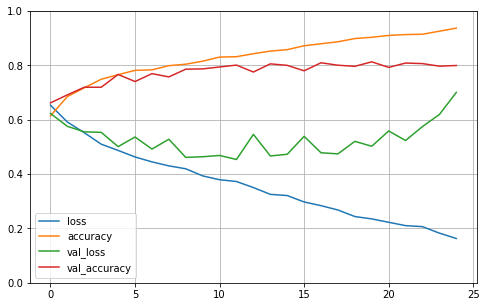

In [20]:
import pandas as pd
from matplotlib import pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

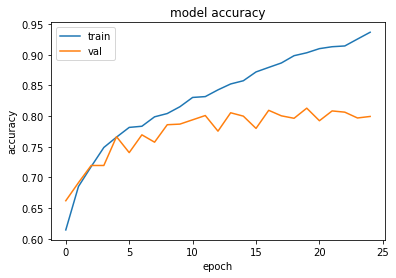

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

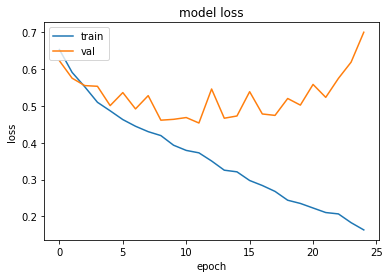

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 5200), started 5 days, 10:58:02 ago. (Use '!kill 5200' to kill it.)

<div class="alert alert-block alert-info">
<b><h1>6. Making a Prediction</h1></div>
<a class="anchor" id="6.-Making a Prediction"></a>
    
[[back to the top](#Table-of-content:)]

### Selecting a File

In [41]:
from ipywidgets import Button
from tkinter import Tk, filedialog
from IPython.display import clear_output, display

def select_files(b):
    clear_output()
    root = Tk()
    root.withdraw() # Hide the main window.
    root.call('wm', 'attributes', '.', '-topmost', True) # Raise the root to the top of all windows.
    b.files = filedialog.askopenfilename(multiple=True) # List of selected files will be set button's file attribute.
    print(b.files) # Print the list of files selected.

fileselect = Button(description="File select")
fileselect.on_click(select_files)

display(fileselect)

Button(description='File select', style=ButtonStyle())

In [34]:
files = fileselect.files

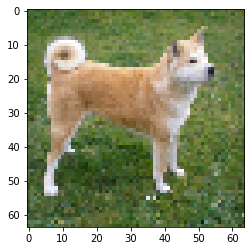

In [38]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(files[0], target_size = (64, 64))

plt.imshow(test_image)   
plt.show()

In [39]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

In [40]:
print(prediction)

dog
